<a href="https://colab.research.google.com/github/kalz2q/mycolabnotebooks/blob/master/doingmath02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# メモ

> Doing Math with Python: Use Programming to Explore Algebra, Statistics, Calculus, and More!  
> Amit Saha

を `Colab` でなぞりながら読む。

というプロジェクトの p. 149 あたり、Chapter 6 以降がこのファイルである。

6章 図形とフラクタル Drawing Geometric Shapes and Fractals  
7章 微積分 Solving Calculus Problems

の予定。

# 円を描く

最初に円を描く、として次のような例が載っている。 いままでの matplotlib の使い方とだいぶ違うので学び直し、位置付け、が必要な気がする。

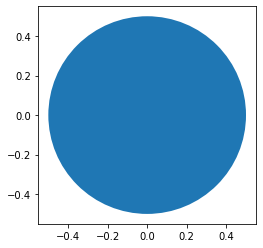

In [ ]:
import matplotlib.pyplot as plt


def create_circle():
    circle = plt.Circle((0, 0), radius=0.5)
    return circle


def show_shape(patch):
    ax = plt.gca()
    ax.add_patch(patch)
    plt.axis('scaled')
    plt.show()


c = create_circle()
show_shape(c)


def を外して実験してみよう。

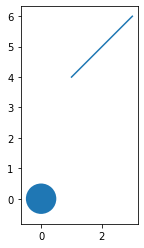

In [7]:
import matplotlib.pyplot as plt

# ax = plt.gca()
fig = plt.figure()
ax = fig.add_subplot()

c = plt.Circle((0,0), radius=0.5)

ax.add_patch(c)
ax.plot([1,2,3],[4,5,6])
# plt.axis('scaled')
# ax.axis('equal')
ax.set_aspect('equal')
plt.show()

基本的に普通の pyplot で Circle とかの命令で図を描いて、add_patch で 追加して、plt.show すればいいみたい。


縦横比がおかしかったら

ax.set_aspect('equal')

とする、とのこと。

縁の色 edge color と塗りつぶしの色 face color (fill color) は fc='g'、 ec='r' のように指定する。 円以外にも楕円 Ellipse、多角形 Polygon、四辺形 Rectangle、などの patch がある。





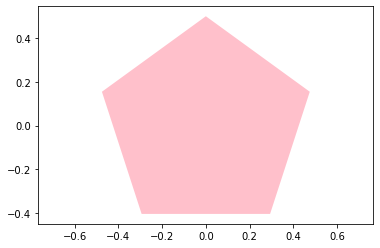

In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Wedge, RegularPolygon

fig = plt.figure()
ax = fig.add_subplot()

c = RegularPolygon((0, 0), radius=0.5, numVertices = 5, fc = 'pink')

ax.add_patch(c)
ax.set_aspect('equal')
ax.axis('equal')
plt.show()

# アニメーション

In [5]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


fig = plt.figure()
ax = fig.add_subplot(xlim=(-10, 10), ylim=(-10, 10))
ax.set_aspect('equal')


circle = plt.Circle((0, 0), radius=0.5)
ax.add_patch(circle)


def update_radius(i, circle):
    circle.radius = i * 0.5
    return circle


anim = FuncAnimation(fig, update_radius, fargs=(circle,), frames=30, interval=200)

plt.title('Simple Circle Animation')
plt.close()
from IPython.display import HTML
HTML(anim.to_jshtml())

## p. 154